In [139]:
import numpy as np
import yfinance as yf
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
import IchimokuLibrary
from itertools import product
import arch.bootstrap as ab

In [140]:
START = "2015-01-01"
END = "2025-01-01"
TICKER = "^GSPC"
TITLE = TICKER + " - " + (datetime.now()).strftime("%Y-%m-%d - %H:%M:%S")
file = "results/covid/no_transaction_costs/in_sample/data2.xlsx"

In [141]:
data = pd.read_excel(file,header=[0,1,2], index_col=[0,1,2,3])

In [142]:
# data = pd.read_excel("confidence_intervals_sharpe.xlsx",header=[0,1,2], index_col=[0,1,2,3])

In [143]:
(data.xs("Sharpe",axis=1, level=2).xs("Lower",axis=0,level=3)).shape

(600, 13)

In [144]:
(data.xs("Sharpe", level=2, axis=1).idxmax().values)

array([(13, 19, 35, 'Upper'), (5, 27, 35, 'Upper'), (7, 27, 35, 'Upper'),
       (5, 29, 45, 'Upper'), (5, 19, 35, 'Upper'), (5, 19, 35, 'Upper'),
       (5, 19, 57, 'Upper'), (5, 19, 35, 'Upper'), (7, 27, 35, 'Upper'),
       (5, 19, 61, 'Upper'), (5, 19, 35, 'Upper'), (5, 19, 57, 'Upper'),
       (13, 17, 35, 'Upper')], dtype=object)

In [145]:
sharpes = ((data.xs("Sharpe", level=2, axis=1).xs("Upper", level=3, axis=0) + data.xs("Sharpe", level=2, axis=1).xs("Lower", level=3, axis=0)) / 2)

In [146]:
sharpes.idxmax()

ex_l_1  en_l_1      (13, 21, 35)
        en_l_2       (5, 27, 35)
        en_l_12      (7, 27, 35)
        en_l_123     (5, 29, 45)
ex_l_2  en_l_1      (11, 27, 35)
        en_l_12      (5, 19, 35)
        en_l_123     (5, 19, 57)
ex_l_3  en_l_2       (5, 19, 35)
        en_l_12      (7, 27, 35)
        en_l_123     (5, 19, 61)
ex_l_4  en_l_12      (5, 19, 35)
        en_l_123     (5, 19, 57)
ex_l_5  en_l_123    (13, 17, 35)
dtype: object

In [147]:
(sharpes.stack([0,1]).nlargest(20).sort_values(ascending=False)).reset_index()

C:\Users\olive\AppData\Local\Temp\ipykernel_14076\2363349858.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  (sharpes.stack([0,1]).nlargest(20).sort_values(ascending=False)).reset_index()


,level_0,level_1,level_2,level_3,level_4,0
0,5,19,61,ex_l_3,en_l_123,2.534438
1,5,19,57,ex_l_3,en_l_123,2.532331
2,5,19,59,ex_l_3,en_l_123,2.532331
3,5,19,55,ex_l_3,en_l_123,2.526729
4,5,19,63,ex_l_3,en_l_123,2.511839
5,7,19,61,ex_l_3,en_l_123,2.466360
6,7,19,57,ex_l_3,en_l_123,2.464873
7,7,19,59,ex_l_3,en_l_123,2.464717
8,7,19,55,ex_l_3,en_l_123,2.459581
9,7,19,63,ex_l_3,en_l_123,2.442371


In [148]:
price_data = pd.read_csv("data2.csv") 
returns = np.log(price_data["Close"] / price_data["Close"].shift(1)).dropna()

In [149]:
IchimokuLibrary.ex_l_1(IchimokuLibrary.apply_ichi(returns))

1       False
2       False
3       False
4       False
5       False
        ...  
2511    False
2512    False
2513     True
2514     True
2515    False
Length: 2515, dtype: bool

<Axes: >

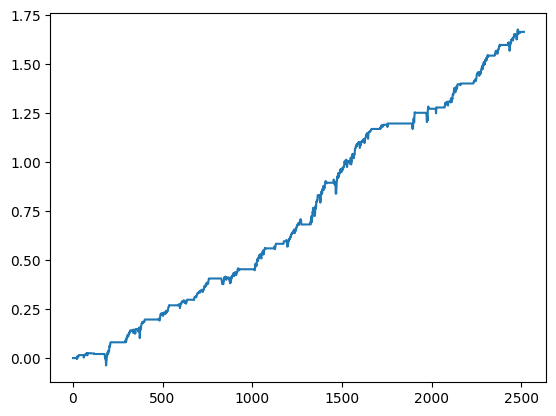

In [ ]:
# strat = IchimokuLibrary.trade()

IchimokuLibrary.trade(returns, "en_l_12","ex_l_3",12,19,50).cumsum().plot()
returns.cumsum().plot()

In [151]:
data.xs("Sharpe", level=2, axis=1).xs("Lower", level=3, axis=0)

ex_l_1                                  ex_l_2            \
            en_l_1    en_l_2   en_l_12  en_l_123    en_l_1   en_l_12   
5  17 35 -0.490501  0.029207  0.081037  0.092383 -0.437774  0.448250   
      37 -0.490501  0.029207  0.081037  0.103122 -0.437774  0.448250   
      39 -0.490501  0.029207  0.081037  0.306640 -0.437774  0.448250   
      41 -0.490501  0.029207  0.081037  0.306640 -0.437774  0.448250   
      43 -0.490501  0.029207  0.081037  0.309602 -0.437774  0.448250   
...            ...       ...       ...       ...       ...       ...   
13 31 55 -0.877640  0.641201 -0.216949 -0.167179 -0.653015 -0.224076   
      57 -0.877640  0.641201 -0.216949 -0.167179 -0.653015 -0.224076   
      59 -0.877640  0.641201 -0.216949 -0.158238 -0.653015 -0.224076   
      61 -0.877640  0.641201 -0.216949 -0.165837 -0.653015 -0.224076   
      63 -0.877640  0.641201 -0.216949 -0.185476 -0.653015 -0.224076   

                      ex_l_3                        ex_l_4              ex_l_5  
          en_l_123    en_l_2   en_l_12  en_l_123   en_l_12  en_l_123  en_l_123  
5  17 35  0.478131  1.346577  1.294948  1.161355  1.098603  1.090585  0.221571  
      37  0.478131  1.346577  1.294948  1.161355  1.098603  1.090585  0.206055  
      39  0.595357  1.346577  1.294948  1.206077  1.098603  1.113154  0.253832  
      41  0.593546  1.346577  1.294948  1.206077  1.098603  1.112881  0.200700  
      43  0.593546  1.346577  1.294948  1.206077  1.098603  1.113154  0.200700  
...            ...       ...       ...       ...       ...       ...       ...  
13 31 55 -0.416571  1.269878  1.030707  0.717970  0.447994  0.243420  0.308152  
      57 -0.413545  1.269878  1.030707  0.717970  0.447994  0.243420  0.308152  
      59 -0.413545  1.269878  1.030707  0.717970  0.447994  0.243420  0.308152  
      61 -0.413545  1.269878  1.030707  0.717970  0.447994  0.246891  0.308152  
      63 -0.406023  1.269878  1.030707  0.718015  0.447994  0.248005  0.200653  

[600 rows x 13 columns]